In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [7]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m")

In [8]:
training = pd.read_csv("train.csv")

C:\Users\sm22219\AppData\Local\Temp\ipykernel_6240\3481700898.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  training = pd.read_csv("train.csv")


In [9]:
training.shape

(1017209, 9)

In [10]:
training.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
storeData = pd.read_csv("store.csv")

In [12]:
storeData.shape

(1115, 10)

In [13]:
storeData.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
mergedData = pd.merge(training, storeData, how='left', on='Store')

In [15]:
mergedData.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [32]:
X1 = training.iloc[:,0:2]
X2 = training.iloc[:,4:]
X = pd.concat([X1, X2], axis=1, join='inner')

In [35]:
X

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,555,1,1,0,1
1,2,5,625,1,1,0,1
2,3,5,821,1,1,0,1
3,4,5,1498,1,1,0,1
4,5,5,559,1,1,0,1
...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,a,1
1017205,1112,2,0,0,0,a,1
1017206,1113,2,0,0,0,a,1
1017207,1114,2,0,0,0,a,1


In [33]:
Y =  training.iloc[:, 3]
Y

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

In [34]:
corrmat = training.corr()
top_corr_features = corrmat.index

In [38]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

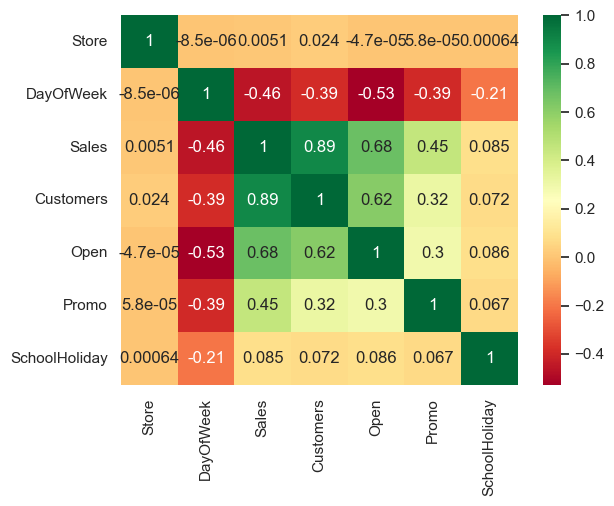

In [39]:
g=sns.heatmap(training[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#state holidays need to be chamged from a to 1

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

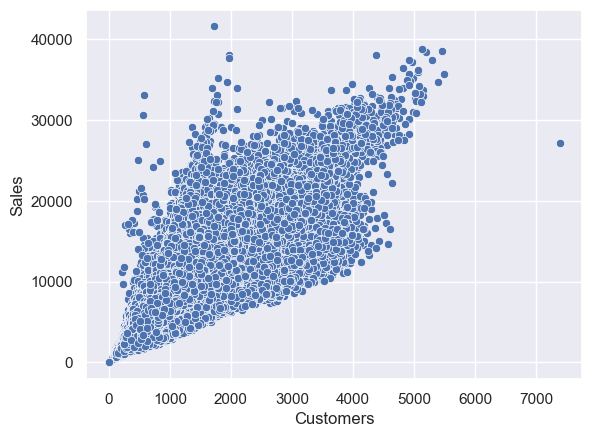

In [42]:
sns.scatterplot(x='Customers',
                    y="Sales",
                    data=training)